In [1]:
import numpy as np
import skimage as ski
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, data
import cv2
from PIL import Image
import scipy.misc
import math

C:\Users\naresh\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [241]:
filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\IMG_0470.JPG"
#filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\8-3-23 - Warm 0.75 Frost.JPG"
#filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\IMG_0468.JPG"
#filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\8-3-23 - White Full Frost.JPG"
#filename = "W:\Advanced Engineering/Vortex Ballistics/Gel Images/NR Image.JPG"
#filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\9-7-23\IMG_0489.JPG"
#filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\9-7-23\IMG_0491.JPG"
#filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\9-7-23\IMG_0493.JPG"
#filename = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\9-7-23\IMG_0495.JPG"
gelImg = io.imread(filename)
fixLength = 34 #Dimension in x-axis
fixHeight = 30 #Dimension in y-axis
dimDiff = fixLength-fixHeight

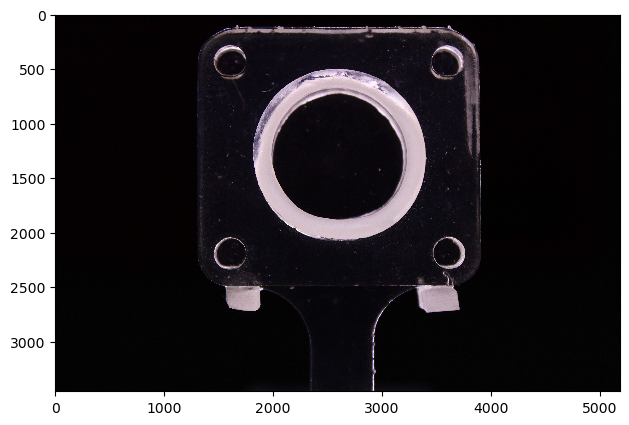

In [242]:
io.imshow(gelImg)
plt.show()

In [243]:
gelImgGray = cv2.cvtColor(gelImg, cv2.COLOR_BGR2GRAY)

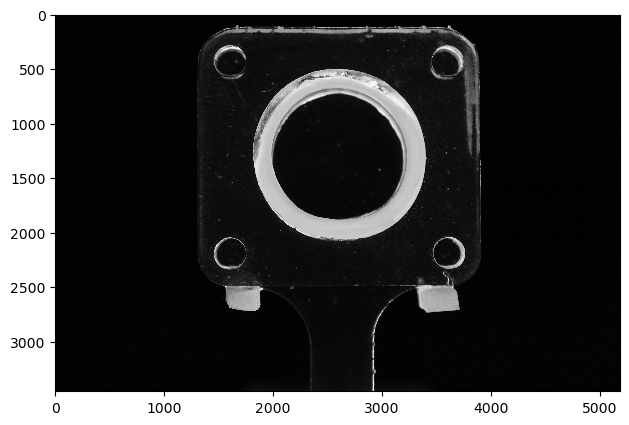

In [244]:
io.imshow(gelImgGray)
plt.show()

In [245]:
# Grayscale, Otsu's threshold, opening
image = cv2.imread(filename)
#image = cv2.medianBlur(image,3)
blank_mask = np.zeros(image.shape, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

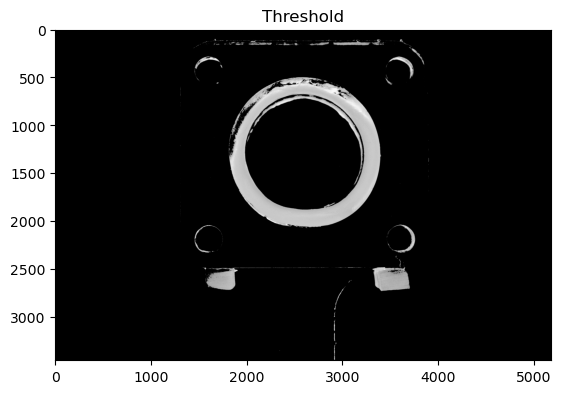

In [246]:
#blur_image = cv2.GaussianBlur(gray, (5, 5), 0)
#thresh = cv2.threshold(blur_image, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)[1]
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_TOZERO)[1]

plt.imshow(thresh, cmap='gray')
plt.title("Threshold")
plt.show()

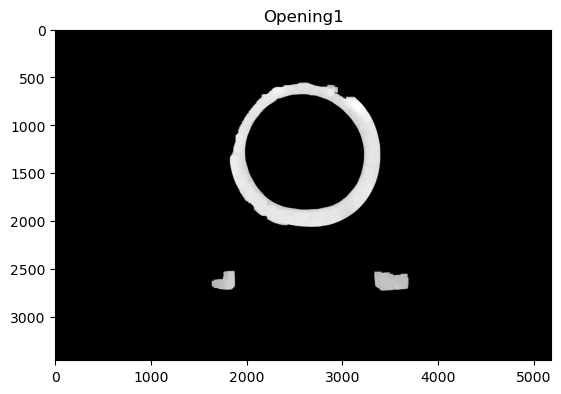

In [247]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
opening1 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel1, iterations=4)

plt.imshow(opening1, cmap='gray')
plt.title("Opening1")
plt.show()

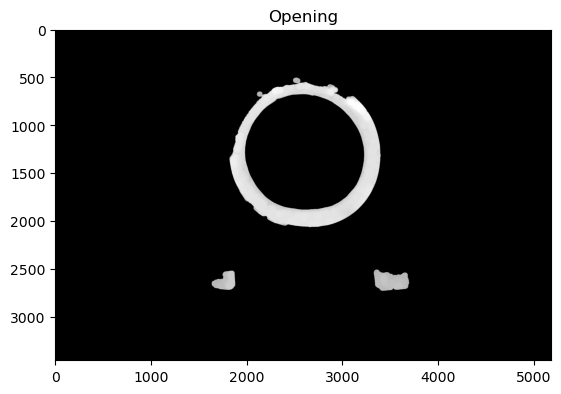

In [248]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=4)

plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.show()

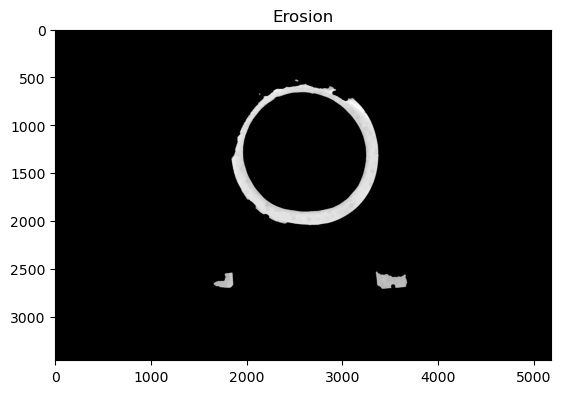

In [249]:
erosionKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
erosion = cv2.erode(opening, erosionKernel, iterations = 3)
plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.show()

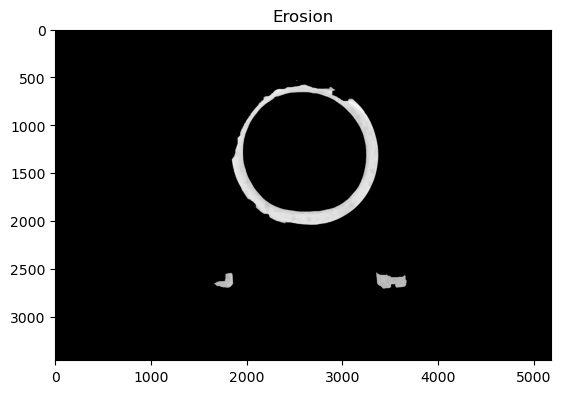

In [250]:
erosionKernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
erosion1 = cv2.erode(opening, erosionKernel1, iterations = 3)
plt.imshow(erosion1, cmap='gray')
plt.title("Erosion")
plt.show()

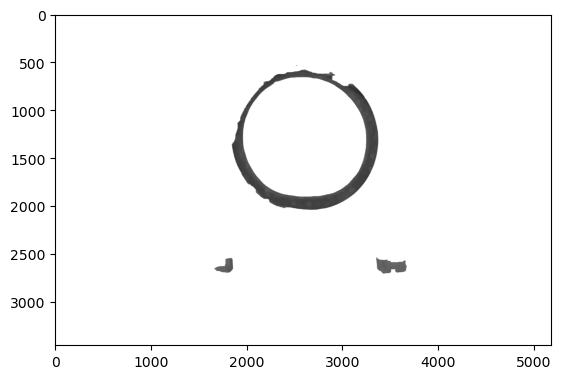

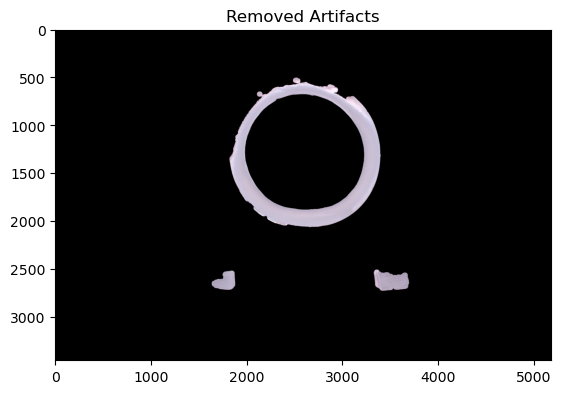

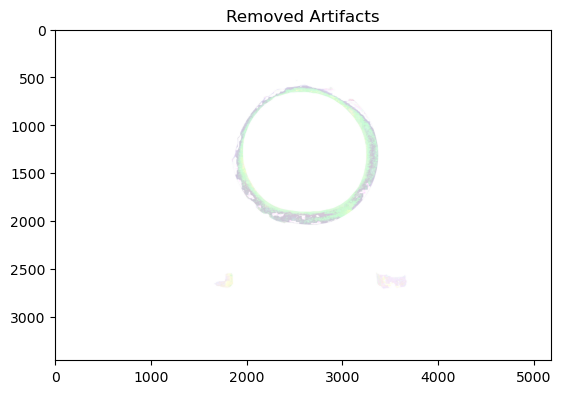

In [251]:
inverse = 255 - erosion1
inverse = cv2.merge([inverse,inverse,inverse])
plt.imshow(inverse)
plt.show()
removed_artifacts = cv2.bitwise_and(image,image,mask=opening)
plt.imshow(removed_artifacts)
plt.title("Removed Artifacts")
plt.show()
removed_artifacts = cv2.bitwise_or(removed_artifacts, inverse)

plt.imshow(removed_artifacts)
plt.title("Removed Artifacts")
plt.show()

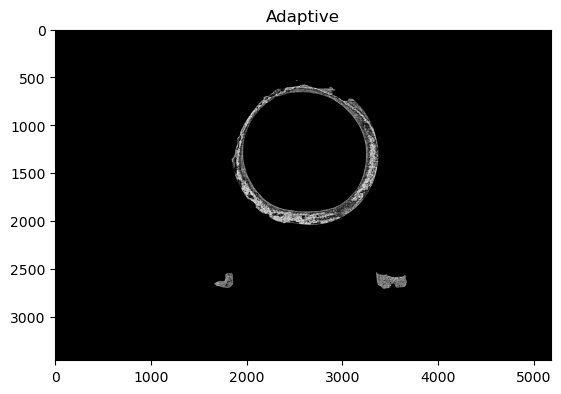

In [252]:
frost_gray = cv2.cvtColor(removed_artifacts, cv2.COLOR_BGR2GRAY)
adaptive = cv2.adaptiveThreshold(frost_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,1)

plt.imshow(adaptive, cmap='gray')
plt.title("Adaptive")
plt.show()

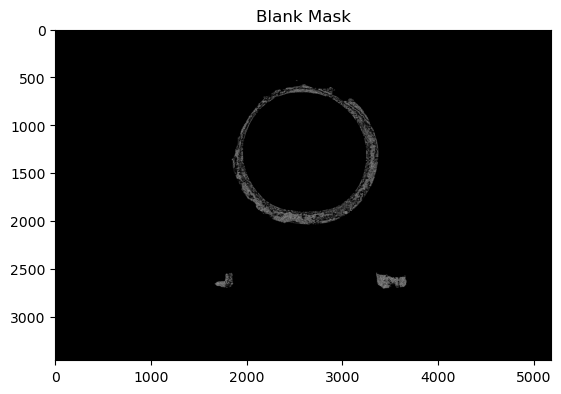

In [253]:
cnts = cv2.findContours(adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    area = cv2.contourArea(c)
    if area < 5000:
        cv2.drawContours(blank_mask, [c], -1, (255,255,255), 1)

blank_mask = cv2.cvtColor(blank_mask, cv2.COLOR_BGR2GRAY)

plt.imshow(blank_mask, cmap='gray')
plt.title("Blank Mask")
plt.show()

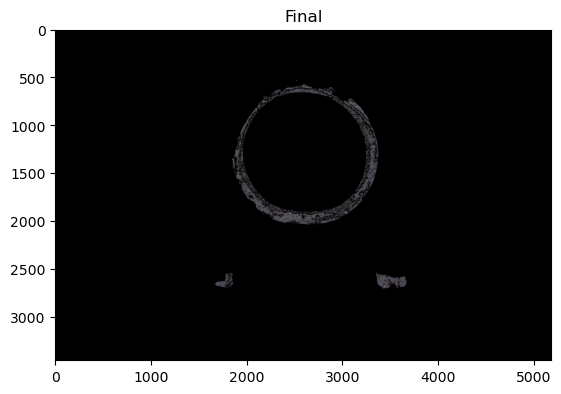

In [254]:
final = cv2.bitwise_and(image, image, mask=blank_mask)
finalBlack = 255 - final
finalBlack = cv2.merge([finalBlack,finalBlack,finalBlack])
#final[blank_mask==0] = (255,255,255) # White version

plt.imshow(final, cmap='gray')
plt.title("Final")
plt.show()

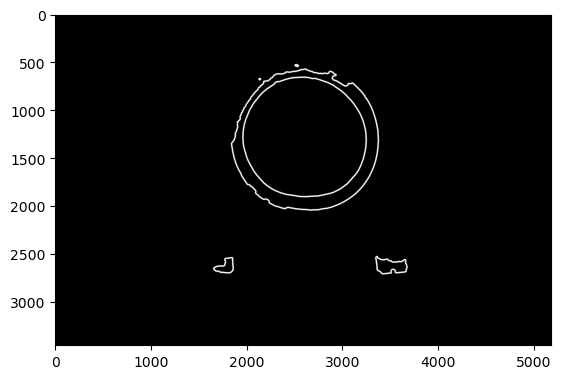

In [255]:
#finalGray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
finalGray = erosion
contours, hierarchy = cv2.findContours(finalGray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
outlineMid = np.zeros_like(finalGray)
cv2.drawContours(outlineMid, contours, -1, 255, 13)

plt.imshow(outlineMid, cmap='gray')

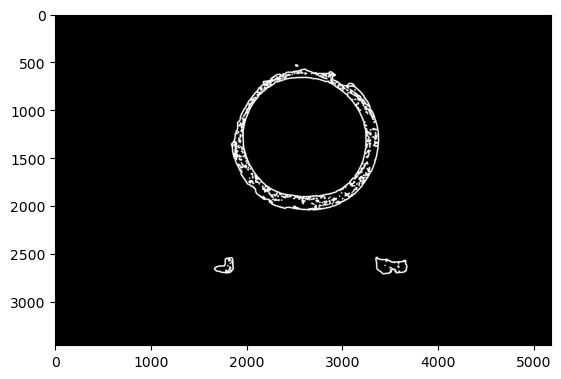

In [256]:
finalGray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
#finalGray = erosion
contours, hierarchy = cv2.findContours(finalGray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
outline = np.zeros_like(finalGray)
cv2.drawContours(outline, contours, -1, 255, 8)

contours, hierarchy = cv2.findContours(outline.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
outlineFin = np.zeros_like(outline)
cv2.drawContours(outlineFin, contours, -1, 255, 13)

plt.imshow(outlineFin, cmap='gray')

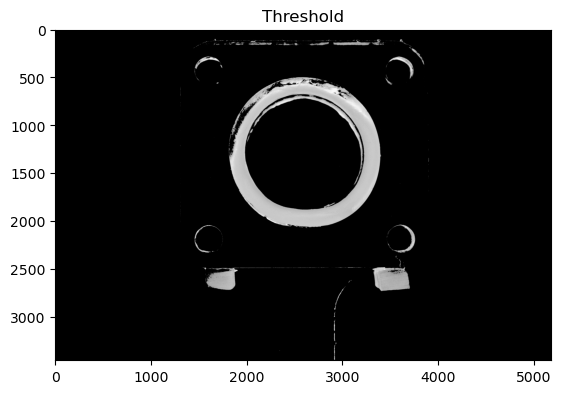

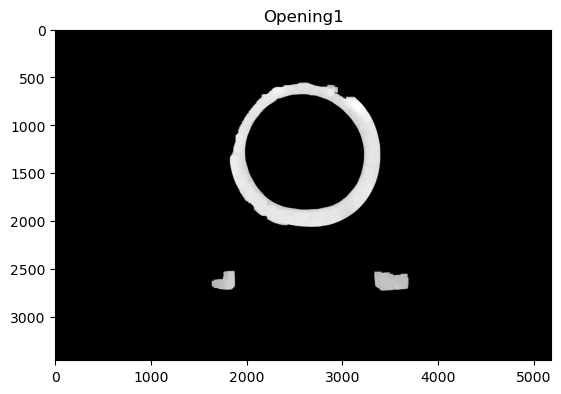

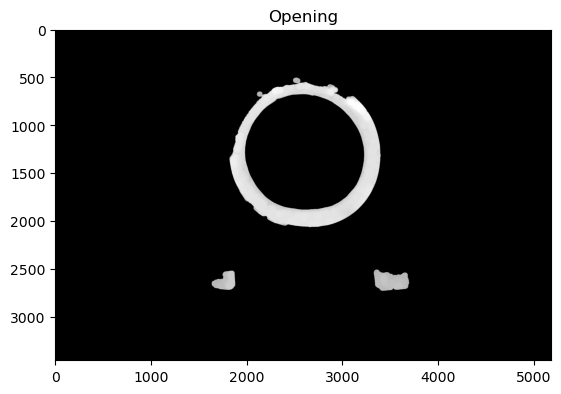

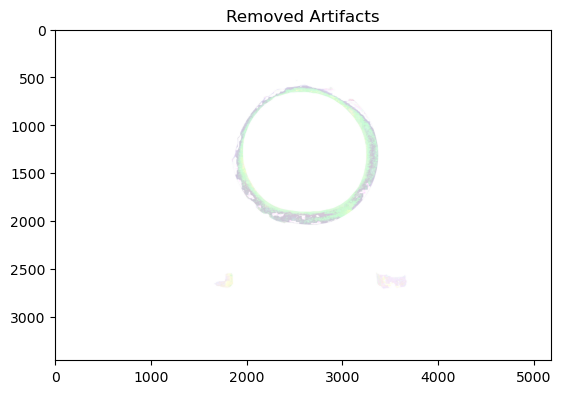

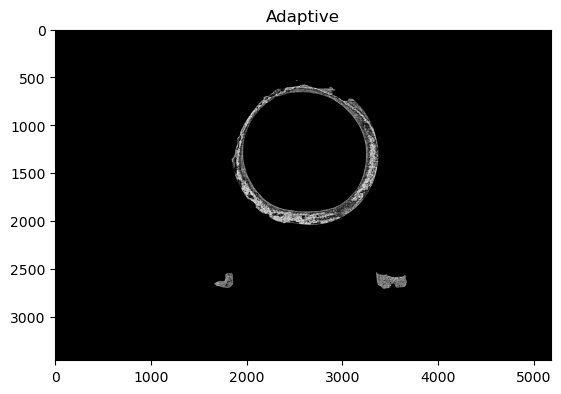

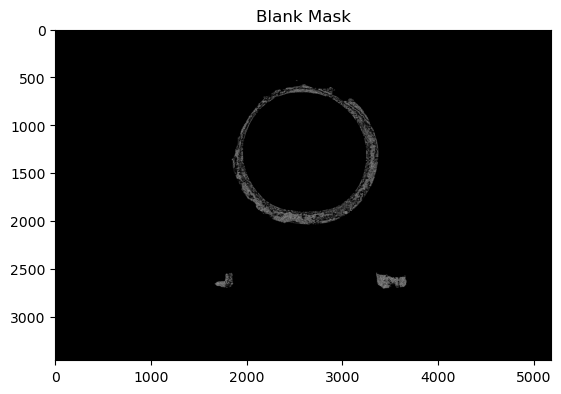

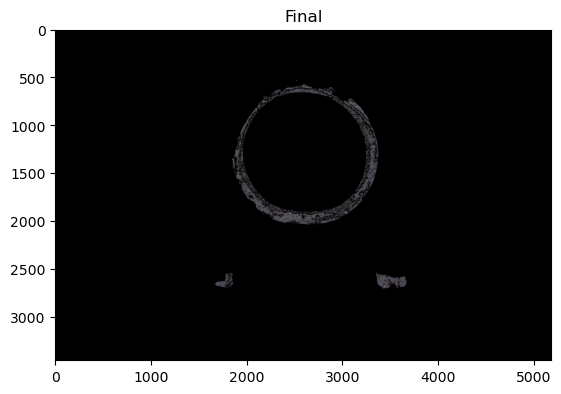

In [257]:
# cv2.startWindowThread()
# cv2.imshow('thresh', thresh)
# cv2.imshow('opening', opening)
# cv2.imshow('opening1', opening1)
# cv2.imshow('removed_artifacts', removed_artifacts)
# cv2.imshow('adaptive', adaptive)
# cv2.imshow('blank_mask', blank_mask)
# cv2.imshow('final', final)
# cv2.waitKey()
# cv2.destroyAllWindows()
plt.imshow(thresh, cmap='gray')
plt.title("Threshold")
plt.show()
plt.imshow(opening1, cmap='gray')
plt.title("Opening1")
plt.show()
plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.show()
plt.imshow(removed_artifacts)
plt.title("Removed Artifacts")
plt.show()
plt.imshow(adaptive, cmap='gray')
plt.title("Adaptive")
plt.show()
plt.imshow(blank_mask, cmap='gray')
plt.title("Blank Mask")
plt.show()
plt.imshow(final, cmap='gray')
plt.title("Final")
plt.show()

In [258]:
img = final
tmp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying thresholding technique
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)

# Using cv2.split() to split channels
# of coloured image
b, g, r = cv2.split(img)

# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]

# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 4)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

# percentiles = np.percentile(dst, [0, 25, 75, 100])
# targets = np.geomspace(10, 255, 4)
# b = np.interp(dst, percentiles, targets).astype(np.uint8)
# g = np.zeros_like(dst)
# r = np.interp(dst, percentiles, targets[::-1]).astype(np.uint8)

bOVer = []
gOver = []
rOver = []
# for row in range(len(dst)):
#     for col in range(len(dst[0])):
#         if dst[row, col] <= 15:
#             b.append(254)
#             g.append(254)
#             r.append(254)
#         else:
#             r.append(254)
#             g.append(0)
#             b.append(0)

gOver = np.multiply(np.ones((len(gelImg), len(gelImg[0]))), gelImg[:,:,1])
#g = np.ones((len(image), len(image[0]))) * 254
# b = (1 - np.ceil(dst/255)) * 254
# r = (1 - np.ceil(dst/255)) * 254
bOver = np.multiply((1 - np.ceil(dst/255)), gelImg[:,:,2])
rOver = np.multiply((1 - np.ceil(dst/255)), gelImg[:,:,0])

gOutlineMid = np.multiply(np.ones((len(gelImg), len(gelImg[0]))), gelImg[:,:,1])
bOutlineMid = np.multiply((1 - np.ceil(outlineMid/255)), gelImg[:,:,2])
rOutlineMid = np.multiply((1 - np.ceil(outlineMid/255)), gelImg[:,:,0])

gOutlineFin = np.multiply(np.ones((len(gelImg), len(gelImg[0]))), gelImg[:,:,1])
bOutlineFin = np.multiply((1 - np.ceil(outlineFin/255)), gelImg[:,:,2])
rOutlineFin = np.multiply((1 - np.ceil(outlineFin/255)), gelImg[:,:,0])

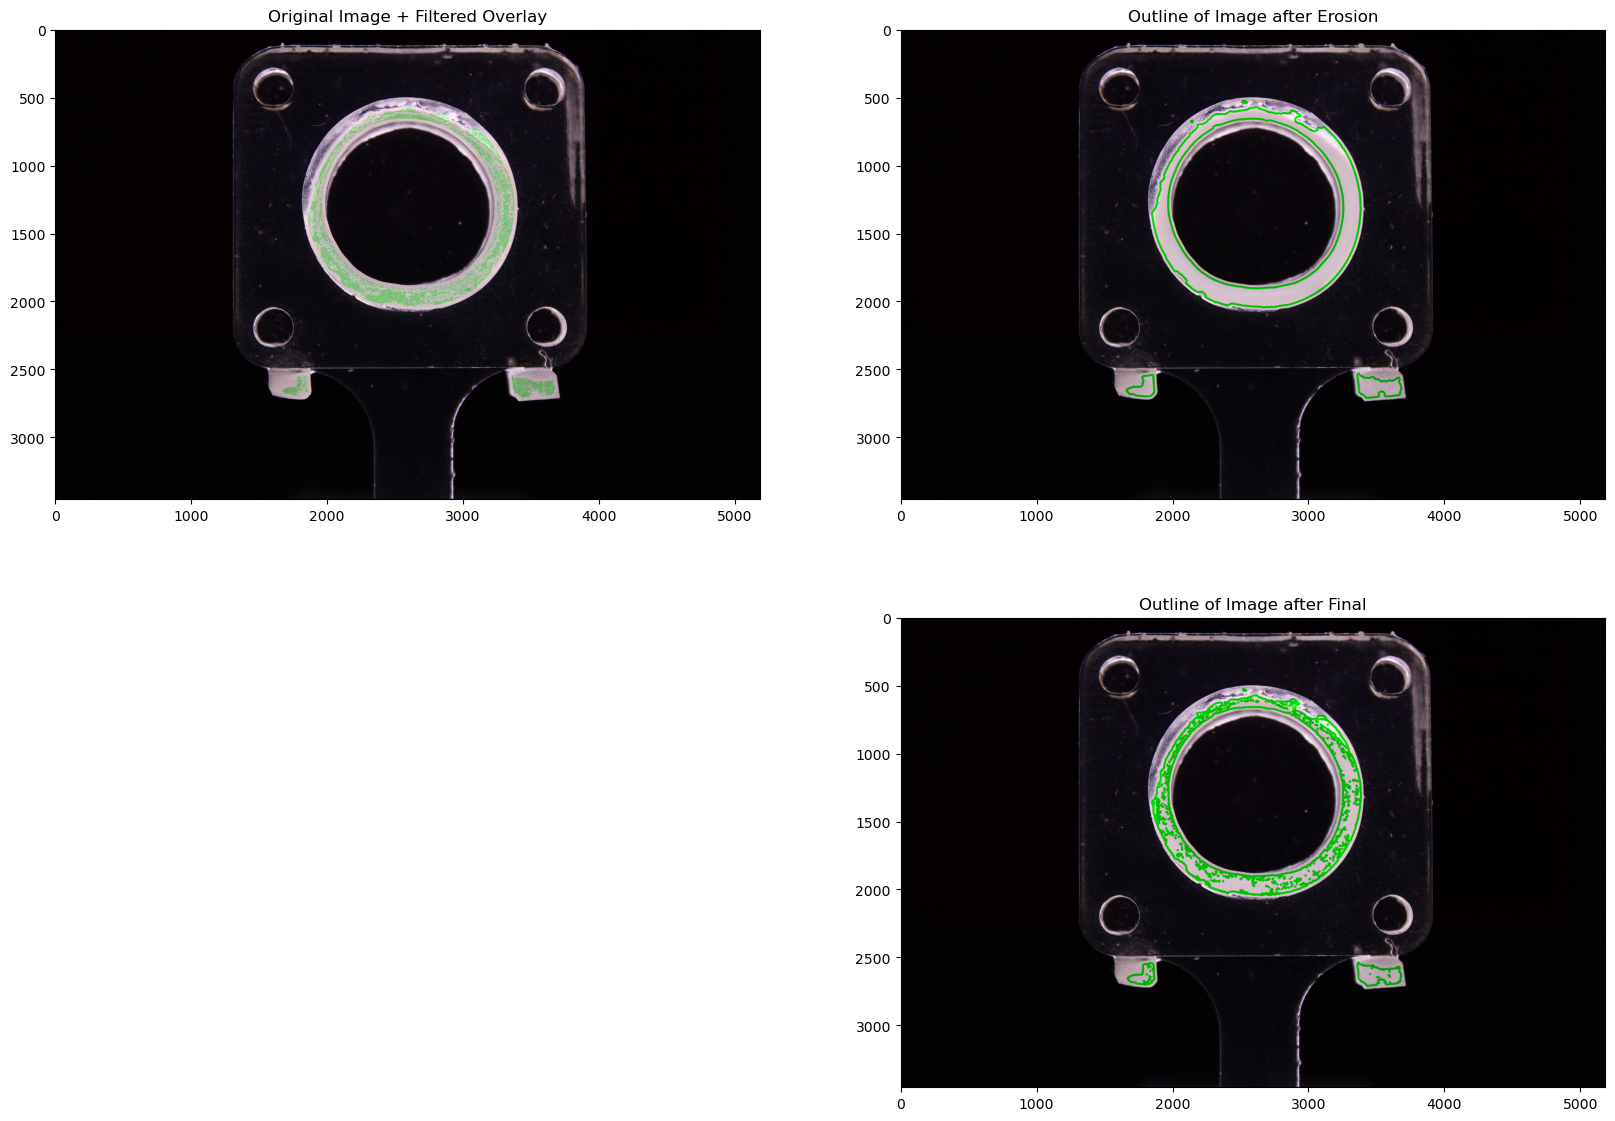

In [259]:
# r = np.reshape(r, (len(image), len(image[0])))
# g = np.reshape(g, (len(image), len(image[0])))
# b = np.reshape(b, (len(image), len(image[0])))
#overlay = np.zeros([len(rOver), len(rOver[0]), 3], dtype=np.uint8)
overlay = np.zeros([len(rOver), len(rOver[0]), 3], dtype=np.uint8)
overlay[:,:,0] = rOver
overlay[:,:,1] = gOver
overlay[:,:,2] = bOver

outlineMid = np.zeros([len(rOutlineMid), len(rOutlineMid[0]), 3], dtype=np.uint8)
outlineMid[:,:,0] = rOutlineMid
outlineMid[:,:,1] = gOutlineMid
outlineMid[:,:,2] = bOutlineMid

outlineFin = np.zeros([len(rOutlineFin), len(rOutlineFin[0]), 3], dtype=np.uint8)
outlineFin[:,:,0] = rOutlineFin
outlineFin[:,:,1] = gOutlineFin
outlineFin[:,:,2] = bOutlineFin

fig = plt.figure(figsize=(20, 14))
fig.add_subplot(2, 2, 1)
plt.imshow(overlay)
plt.title("Original Image + Filtered Overlay")
fig.add_subplot(2, 2, 2)
plt.imshow(outlineMid)
plt.title("Outline of Image after Erosion")
fig.add_subplot(2, 2, 4)
plt.imshow(outlineFin)
plt.title("Outline of Image after Final")
plt.show()

### Graphical Output of Thickness

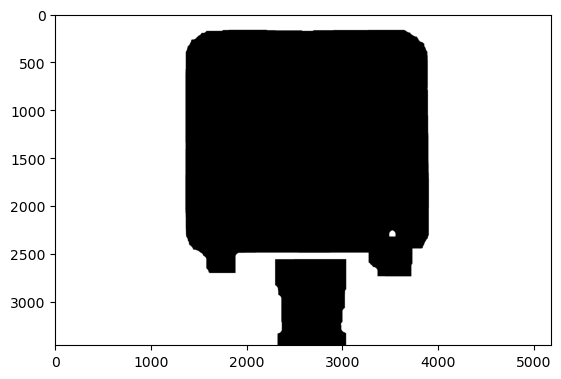

In [260]:
kernelCenter = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

threshCenter = cv2.threshold(gelImgGray, 0, 255, cv2.THRESH_BINARY_INV)[1]
contours, hierarchy = cv2.findContours(threshCenter.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
fullOutline = np.zeros_like(threshCenter)
cv2.drawContours(fullOutline, contours, -1, 255, 100)
fullOutline = cv2.erode(fullOutline,kernelCenter,iterations = 15)

kernelClose = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
closing = cv2.morphologyEx(fullOutline, cv2.MORPH_CLOSE, kernelClose, iterations = 30)

plt.imshow(closing, cmap='gray')

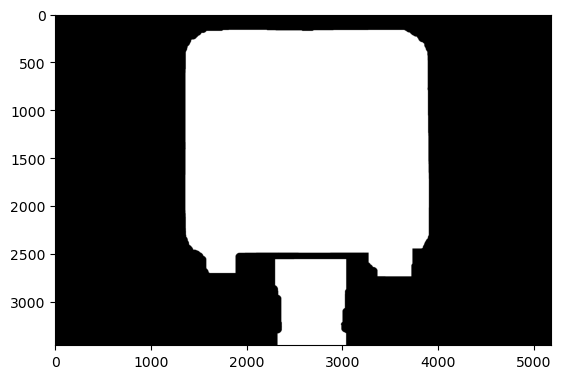

In [261]:
im_th = 255-closing
im_floodfill = im_th.copy()
h,w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = im_th | im_floodfill_inv

plt.imshow(im_out, cmap='gray')
plt.show()

In [262]:
#Sizing the Image

midLine = im_out[math.ceil(len(im_out)/2), :]
nonZeroInd = np.nonzero(im_out[math.ceil(len(im_out)/2), :])[0]

pixLen = round((nonZeroInd[-1]-nonZeroInd[0])/fixLength)

1558


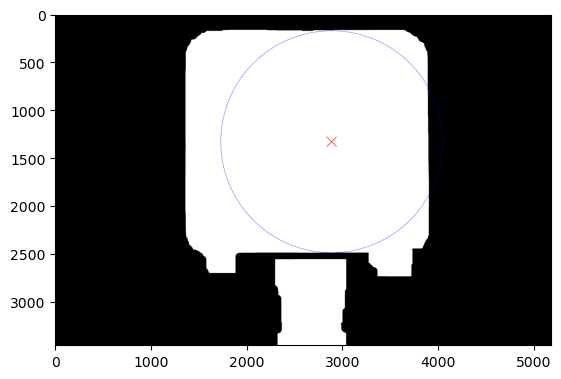

In [263]:
mask = im_out

"""
Get the maximum/largest inscribed circle inside mask/polygon/contours.
Support non-convex/hollow shape
"""
dist_map = cv2.distanceTransform(mask, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
_, radius, _, center = cv2.minMaxLoc(dist_map)

if dimDiff > 0:
    xCenter = center[0] + round(dimDiff/2*pixLen)
    yCenter = center[1]
else:
    xCenter = center[0]
    yCenter = center[1] + round(dimDiff/2*pixLen)
    
# xCenter = center[0]
# yCenter = center[1]
print(xCenter-yCenter)
    
result = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
cv2.circle(result, (xCenter, yCenter), int(radius), (0, 0, 255), 2, cv2.LINE_8, 0)

centerLength = 50
cv2.line(result, (xCenter-centerLength, yCenter-centerLength), (xCenter+centerLength, yCenter+centerLength), (255,0,0), 5)
cv2.line(result, (xCenter-centerLength, yCenter+centerLength), (xCenter+centerLength, yCenter-centerLength), (255,0,0), 5)

# minEnclosingCircle directly by cv2
# contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
# center2, radius2 = cv2.minEnclosingCircle(np.concatenate(contours, 0))
# cv2.circle(result, (int(center2[0]), int(center2[1])), int(radius2), (0, 255, 0,), 2)

plt.imshow(result)

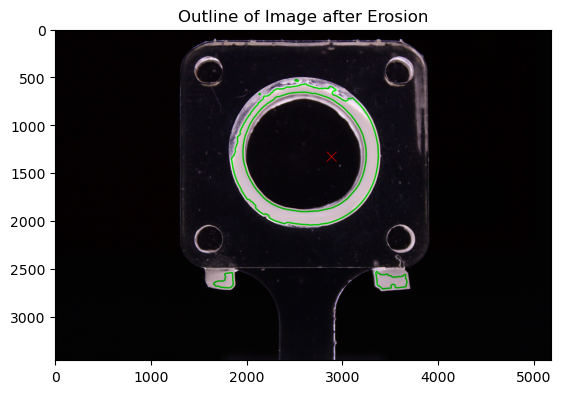

In [264]:
centerLength = 50
cv2.line(outlineMid, (xCenter-centerLength, yCenter-centerLength), (xCenter+centerLength, yCenter+centerLength), (255,0,0), 5)
cv2.line(outlineMid, (xCenter-centerLength, yCenter+centerLength), (xCenter+centerLength, yCenter-centerLength), (255,0,0), 5)
plt.imshow(outlineMid)
plt.title("Outline of Image after Erosion")
plt.show()